In [ ]:
# !pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Monthly_MOM_GMV.csv')

In [ ]:
data.head()

,Date,Revenue
0,01-09-2021,204808226.4
1,01-10-2021,359857813.4
2,01-11-2021,428983174.4
3,01-12-2021,495224637.8
4,01-01-2022,382416117.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     15 non-null     object 
 1   Revenue  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
data.tail()

,Date,Revenue
10,01-07-2022,589672476.0
11,01-08-2022,822062764.8
12,01-09-2022,654104706.0
13,01-10-2022,807872121.4
14,01-11-2022,669243018.1


In [ ]:
# Converting Date column (Object) to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# checking Date column (if it is converted or not)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     15 non-null     datetime64[ns]
 1   Revenue  15 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 368.0 bytes


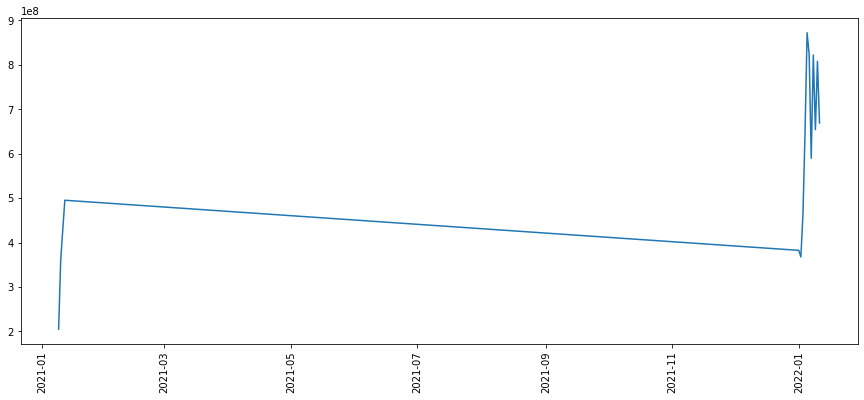

In [ ]:
#plotting graph of dataframe
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Date'],data['Revenue'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# instantiate prophet model and save to variable m
# Date and Month columns should be ds and y in prophet
m = Prophet()
data.columns = ['ds','y']

In [ ]:
# fit on the data
model = m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfi36q3/hgdg68i1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfi36q3/qkanh25c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85758', 'data', 'file=/tmp/tmp3bfi36q3/hgdg68i1.json', 'init=/tmp/tmp3bfi36q3/qkanh25c.json', 'output', 'file=/tmp/tmp3bfi36q3/prophet_modeli7a8t2oo/prophet_model-20221211103914.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
375,2023-01-07,9.094176e+08,6.301975e+08,9.360405e+08,9.094176e+08,9.094177e+08,-1.225274e+08,-1.225274e+08,-1.225274e+08,-1.225274e+08,-1.225274e+08,-1.225274e+08,0.0,0.0,0.0,7.868903e+08
376,2023-01-08,9.100670e+08,6.219570e+08,9.380769e+08,9.100670e+08,9.100671e+08,-1.324417e+08,-1.324417e+08,-1.324417e+08,-1.324417e+08,-1.324417e+08,-1.324417e+08,0.0,0.0,0.0,7.776254e+08
377,2023-01-09,9.107164e+08,7.242774e+08,1.025924e+09,9.107164e+08,9.107164e+08,-2.707302e+07,-2.707302e+07,-2.707302e+07,-2.707302e+07,-2.707302e+07,-2.707302e+07,0.0,0.0,0.0,8.836434e+08
378,2023-01-10,9.113658e+08,7.611196e+08,1.082032e+09,9.113658e+08,9.113658e+08,9.194026e+06,9.194026e+06,9.194026e+06,9.194026e+06,9.194026e+06,9.194026e+06,0.0,0.0,0.0,9.205598e+08
379,2023-01-11,9.120152e+08,9.525088e+08,1.269200e+09,9.120152e+08,9.120152e+08,2.021665e+08,2.021665e+08,2.021665e+08,2.021665e+08,2.021665e+08,2.021665e+08,0.0,0.0,0.0,1.114182e+09


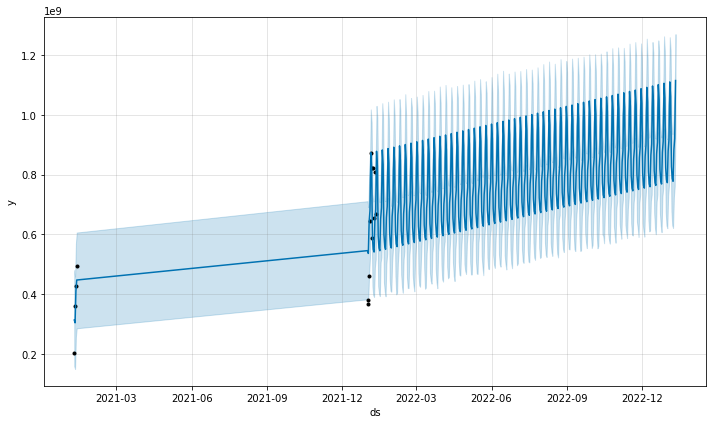

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
forecast['yhat'].sum()

298543150826.1819

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from prophet.serialize import model_to_json, model_from_json
with open('serialized_model.json', 'w') as fout:
  fout.write(model_to_json(m))  # save model

In [25]:
with open('serialized_model.json', 'r') as fin:
  m = model_from_json(fin.read()) # Load model